In [1]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot

In [2]:
#LOADING DATA
#input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input.csv')
#output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output.csv')

In [3]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input2.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
#input_data = input_data.iloc[:,:1]
#print(input_data)

In [4]:
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output2.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

In [111]:
#input_data = input_data.iloc[:,1:]
#output_data = output_data.iloc[:,1:]

In [10]:
split_columns = 1

In [113]:
#output_data = np.array(output_data)
#print(output_data.shape)

#output_data = np.array(output_data)

#Y = list()

#for i in range((int(split_columns/2)),output_data.shape[0], split_columns):
#    Y.append(output_data[i])

#Y = array(Y)
#print(Y.shape)

#DECODING Y
# integer encode direction
#encoder = LabelEncoder()
#Y = encoder.fit_transform(Y)
#print(Y.shape)



In [11]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

output_data = np.array(output_data)

Y = list()

for i in range(int(output_data.shape[0]/split_columns)):
    condition = output_data[(i*split_columns)]    
    behavior = []
    if(condition=='DROWSY'):
        behavior = [0,1,0]
    elif(condition=='AGGRESSIVE'):
        behavior = [0,0,1]
    else:
        behavior = [1,0,0]
    
    Y.append(behavior)

Y = array(Y)
print(Y.shape)

(30929, 3)


In [12]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 34)
(30929, 3)


In [13]:
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
print(X.shape)

(30929, 1, 34)


In [14]:
#SPLITTING TRAINING AND TEST DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [15]:
#SPLITTING TRAINING AND TEST DATA
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 34)
(6186, 1, 34)
(24743, 3)
(6186, 3)


In [16]:
X_train = np.asarray(X_train).astype('float32')

In [17]:
Y_train = np.asarray(Y_train).astype('float32')

In [18]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) #100,34
model.add(LSTM(100, activation = 'tanh' , return_sequences=True, input_shape=(X.shape[1], X.shape[2]))) #100,34
model.add(LSTM(100, ))
#model.add(Dropout(0.2))
model.add(Dense(Y.shape[1])) #3
model.compile(optimizer='adam', loss='mae', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            54000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 100)            80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 215,103
Trainable params: 215,103
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit network
history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

Epoch 1/50
774/774 [==============================] - 4s 5ms/step - loss: 0.3335 - accuracy: 0.4601 - val_loss: 0.3334 - val_accuracy: 0.4842
Epoch 2/50
774/774 [==============================] - 3s 4ms/step - loss: 0.3205 - accuracy: 0.4805 - val_loss: 0.3125 - val_accuracy: 0.4549
Epoch 3/50
774/774 [==============================] - 3s 3ms/step - loss: 0.2972 - accuracy: 0.5294 - val_loss: 0.2733 - val_accuracy: 0.5737
Epoch 4/50
774/774 [==============================] - 3s 3ms/step - loss: 0.2681 - accuracy: 0.5859 - val_loss: 0.2528 - val_accuracy: 0.6104
Epoch 5/50
774/774 [==============================] - 3s 3ms/step - loss: 0.2492 - accuracy: 0.6366 - val_loss: 0.2303 - val_accuracy: 0.6752
Epoch 6/50
774/774 [==============================] - 3s 4ms/step - loss: 0.2304 - accuracy: 0.6673 - val_loss: 0.2143 - val_accuracy: 0.6941
Epoch 7/50
774/774 [==============================] - 3s 4ms/step - loss: 0.2154 - accuracy: 0.6883 - val_loss: 0.1973 - val_accuracy: 0.7171
Epoch 

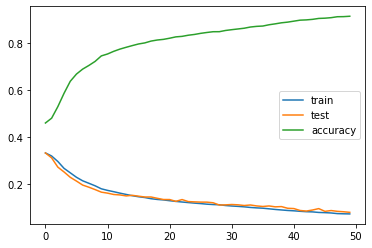

In [22]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.legend()
pyplot.show()

In [137]:
#print(X_test[0])
#check = X_test[0].reshape((1, 100, 34))
#print(x_input)

In [138]:
#pred = model.predict(check)
#print(Y_test[0])
#print(pred)

In [23]:
check2 = X_test.reshape((X_test.shape[0], X.shape[1], X.shape[2]))
predictions = model.predict(check2)
print(predictions.shape)
for i in range(predictions.shape[0]):
    if (predictions[i][0] >= predictions[i][1] and predictions[i][0] >= predictions[i][2]):
        predictions[i] = [1, 0, 0]
    elif (predictions[i][1] >= predictions[i][0] and predictions[i][1] >= predictions[i][2]):
        predictions[i] = [0, 1, 0]
    else:
        predictions[i] = [0, 0, 1]


        
count = 0
for i in range(predictions.shape[0]):
    if(predictions[i][0] == (Y_test[i][0]) and predictions[i][1] == (Y_test[i][1]) and predictions[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the predictions has been estimated, the accuracy is ' + str((count/predictions.shape[0])*100) + ' %')

(6186, 3)
After the predictions has been estimated, the accuracy is 90.2521823472357 %
